In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('housing.csv')

## Elementary Data Analysis

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
len(df)

20640

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


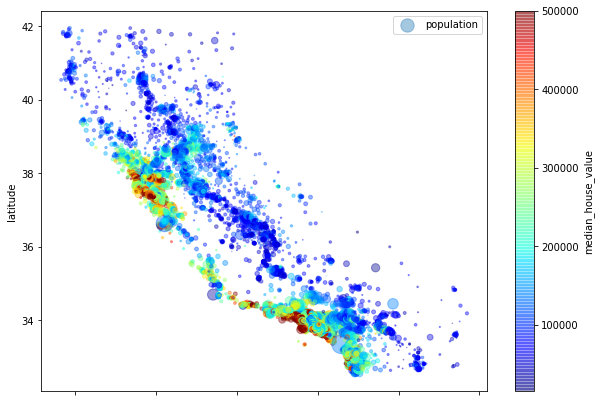

In [ ]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=df["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    )
plt.legend()

## Looking for Correlations 

In [ ]:
## Looking for Correlations 

In [ ]:
df.corr()['median_house_value'].sort_values()

latitude             -0.144160
longitude            -0.045967
population           -0.024650
total_bedrooms        0.049686
households            0.065843
housing_median_age    0.105623
total_rooms           0.134153
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

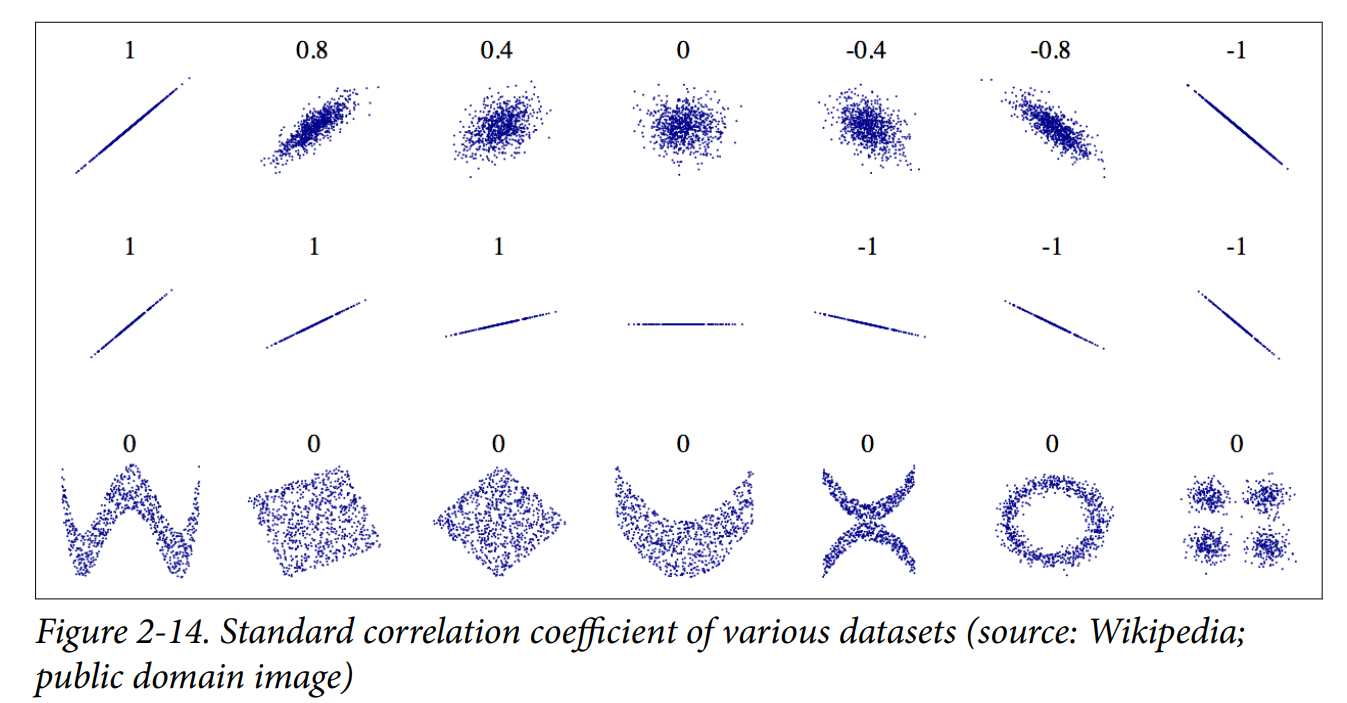

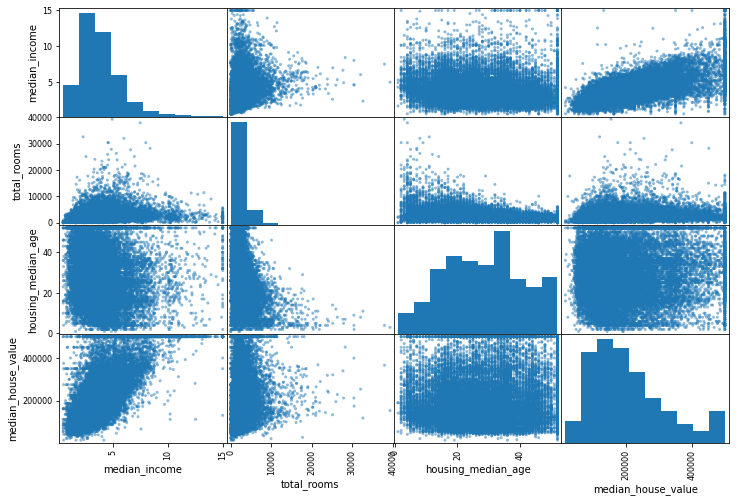

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ['median_income', 'total_rooms', 'housing_median_age', 'median_house_value']
scatter_matrix(df[attributes], figsize=(12,8));

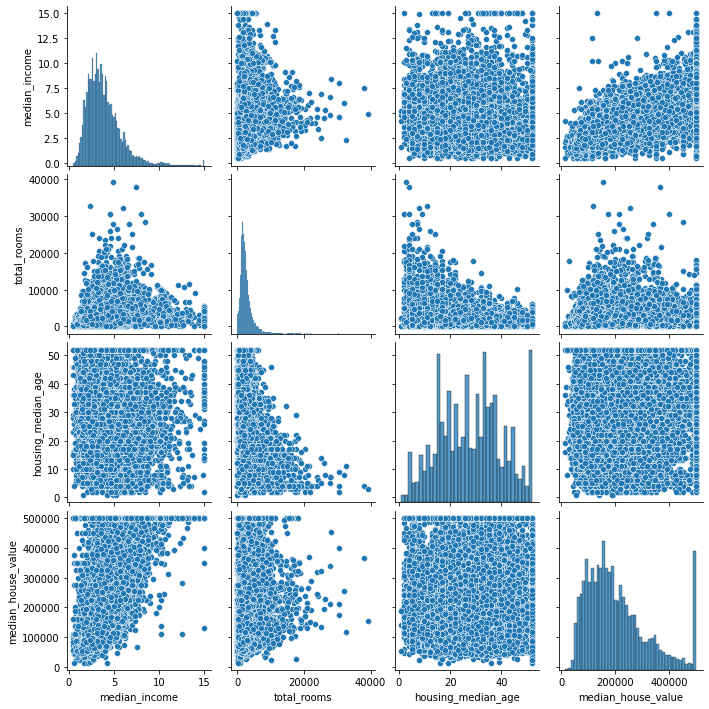

In [ ]:
sns.pairplot(df[attributes]);

**The most promising attribute to predict the median house value is the median
income**

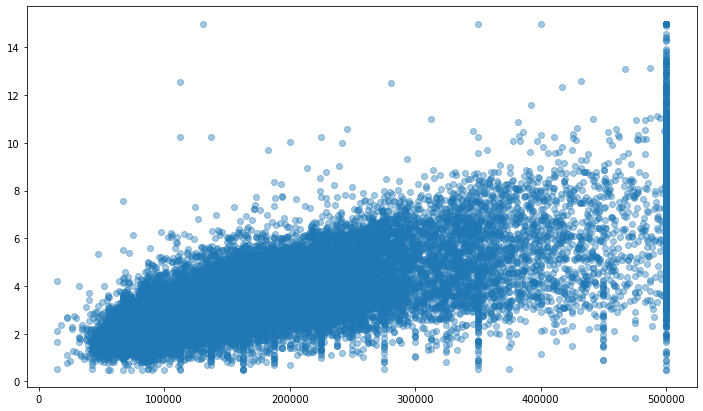

In [ ]:
%matplotlib inline
plt.figure(figsize=(12,7))
plt.scatter(x= df['median_house_value'], y = df['median_income'], alpha=0.4);
# plt.scatter()
# sns.scatterplot(data=df, x='median_house_value', y='median_income', alpha=0.4)

In [ ]:
df["rooms_per_household"] = df["total_rooms"]/df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"]=df["population"]/df["households"]

In [ ]:
df.corr()['median_house_value'].sort_values()

bedrooms_per_room          -0.255880
latitude                   -0.144160
longitude                  -0.045967
population                 -0.024650
population_per_household   -0.023737
total_bedrooms              0.049686
households                  0.065843
housing_median_age          0.105623
total_rooms                 0.134153
rooms_per_household         0.151948
median_income               0.688075
median_house_value          1.000000
Name: median_house_value, dtype: float64

## Train Test Split

In [ ]:
mean_bedrooms = X['total_bedrooms'].mean()
X['total_bedrooms'].fillna(mean_bedrooms, inplace = True)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.4+ MB


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('median_house_value', axis = 1)
y= df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 20046 to 3665
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      3921 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   ocean_proximity     4128 non-null   object 
dtypes: float64(8), object(1)
memory usage: 322.5+ KB


**Scikit-Learn provides a handy class to take care of missing values: `SimpleImputer`**<br>
Since the median can only be computed on numerical attributes, we need to create a copy of the data without the text attribute ocean_proximity:

In [ ]:
X_train_cat = X_train["ocean_proximity"]

In [ ]:
X_train_cat_pd = pd.get_dummies(X_train["ocean_proximity"])
X_test_cat_pd = pd.get_dummies(X_test["ocean_proximity"])

In [ ]:
X_train_cat_pd

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
14196,0,0,0,0,1
8267,0,0,0,0,1
17445,0,0,0,0,1
14265,0,0,0,0,1
2271,0,1,0,0,0
...,...,...,...,...,...
11284,1,0,0,0,0
11964,0,1,0,0,0
5390,1,0,0,0,0
860,1,0,0,0,0


In [ ]:
X_train = pd.concat([X_train.drop('ocean_proximity', axis = 1), X_train_cat_pd], axis=1)
X_test = pd.concat([X_test.drop('ocean_proximity', axis = 1), X_test_cat_pd], axis=1)

In [ ]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,0,1,0,0,0
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,0,1,0,0,0
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,0,0,0,1,0
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,1,0,0,0,0
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,3165.0,482.0,1351.0,452.0,4.6050,1,0,0,0,0
16623,-120.83,35.36,28.0,4323.0,886.0,1650.0,705.0,2.7266,0,0,0,0,1
18086,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298,1,0,0,0,0
2144,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,0,1,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [ ]:
}len(y_train), len(X_train)

(16512, 16512)

## Training Linear Model

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
X_test

array([[ 0.28534728,  0.1951    , -0.28632369, ..., -0.01556621,
        -0.35564565, -0.3802631 ],
       [ 0.06097472, -0.23549054,  0.11043502, ..., -0.01556621,
        -0.35564565, -0.3802631 ],
       [-1.42487026,  1.00947776,  1.85617335, ..., -0.01556621,
         2.81178749, -0.3802631 ],
       ...,
       [-1.23041404,  0.78014149, -0.28632369, ..., -0.01556621,
        -0.35564565, -0.3802631 ],
       [-0.08860699,  0.52740357,  0.58654547, ..., -0.01556621,
        -0.35564565, -0.3802631 ],
       [ 0.60445493, -0.66608108, -0.92113763, ..., -0.01556621,
        -0.35564565, -0.3802631 ]])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_pred = lr.predict(X_test)
mean_absolute_error(y_pred, y_test)

ValueError: ignored